# Assignment 1 : SMS Spam Classification
# Rishika Tibrewal, MDS202135

## Importing Libraries

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

## Loading training, validation, test data

In [76]:
train=pd.read_csv("Training Data.csv")
val=pd.read_csv("Validation Data.csv")
test=pd.read_csv("Test Data.csv")

In [77]:
train.head()

,Message,Label
0,send yetty number pls,0
1,1 000 cash 2 000 prize claim call09050000327,1
2,hey babe going ever figure going new year,0
3,let use next week princess,0
4,nice talking please dont forget pix want see,0


In [78]:
val.head()

,Message,Label
0,da happy sit together na,0
1,2nd attempt contract u week top prize either 1...,1
2,text carlos let know hang,0
3,shant disturb u anymore jia,0
4,hello u u 2 u b moving flat co need arrange pi...,0


In [79]:
test.head()

,Message,Label
0,watching tv lor funny bluff 4 wat izzit thk im...,0
1,well done 4 costa del sol holiday 5000 await c...,1
2,sm ac sptv new jersey devil detroit red wing p...,1
3,love working home,0
4,get ready put excellent sub face,0


In [80]:
y_train,X_train=train["Label"],train["Message"]
y_val,X_val=val["Label"],val["Message"]
y_test,X_test=test["Label"],test["Message"]

## Converting string to vectors, to give as input to the models

In [81]:
# replacing NAN entries by empty string
X_train = X_train.replace(np.nan, '', regex=True)
X_val = X_val.replace(np.nan, '', regex=True)
X_test = X_test.replace(np.nan, '', regex=True)

In [82]:
vector = CountVectorizer()
X_train_vec=vector.fit_transform(X_train)
X_val_vec=vector.fit_transform(X_val)
X_test_vec=vector.fit_transform(X_test)

In [83]:
X_train_vec.shape

(4025, 6778)

In [60]:
X_train_vec.nnz

34235

In [65]:
# Sparsity %
X_train_vec.nnz*100/(X_train_vec.shape[0]*X_train_vec.shape[1])

0.1254881980246651

In [66]:
X_val_vec.shape

(711, 2407)

In [67]:
X_val_vec.nnz

6139

In [68]:
# Sparsity %
X_val_vec.nnz*100/(X_val_vec.shape[0]*X_val_vec.shape[1])

0.35871698637997357

In [69]:
X_test_vec.shape

(836, 2683)

In [70]:
X_test_vec.nnz

6721

In [71]:
# Sparsity %
X_test_vec.nnz*100/(X_test_vec.shape[0]*X_test_vec.shape[1])

0.29964493791317653

In [73]:
tfidf_transformer = TfidfTransformer()
tfidf_train = tfidf_transformer.fit_transform(X_train_vec)
tfidf_val = tfidf_transformer.fit_transform(X_val_vec)
tfidf_test = tfidf_transformer.fit_transform(X_test_vec)

In [74]:
tfidf_train.shape,tfidf_val.shape,tfidf_test.shape

((4025, 6778), (711, 2407), (836, 2683))

## Training Models

# Multinomial Naive Bayes

In [84]:
mnb = MultinomialNB()
mnb.fit(tfidf_train,y_train)

print('training accuracy is --> ',mnb.score(tfidf_train,y_train)*100)

training accuracy is -->  98.16149068322981


In [85]:
mnb = MultinomialNB()
mnb.fit(tfidf_val,y_val)

print('Validation accuracy is --> ',mnb.score(tfidf_val,y_val)*100)

training accuracy is -->  96.62447257383965


In [95]:
mnb = MultinomialNB()
mnb.fit(tfidf_test,y_test)

print('Test accuracy is --> ',mnb.score(tfidf_test,y_test)*100)

Test accuracy is -->  94.73684210526315


In [88]:
y_pred = mnb.predict(tfidf_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       732
           1       1.00      0.58      0.73       104

    accuracy                           0.95       836
   macro avg       0.97      0.79      0.85       836
weighted avg       0.95      0.95      0.94       836



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


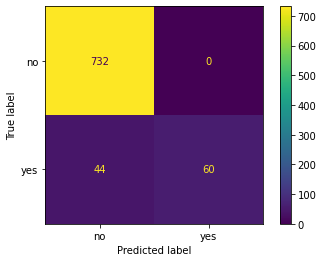

In [93]:
plot_confusion_matrix(mnb ,tfidf_test,y_test,display_labels=['no','yes'])

# Logistic Regression

In [96]:
lr = LogisticRegression()
lr.fit(tfidf_train,y_train)
print('training accuracy is --> ',lr.score(tfidf_train,y_train)*100)

training accuracy is -->  96.96894409937889


In [98]:
lr = LogisticRegression()
lr.fit(tfidf_val,y_val)
print('Validation accuracy is --> ',lr.score(tfidf_val,y_val)*100)

Validation accuracy is -->  89.87341772151899


In [112]:
lr = LogisticRegression()
lr.fit(tfidf_test,y_test)
print('Test accuracy is --> ',lr.score(tfidf_test,y_test)*100)

Test accuracy is -->  89.95215311004785


In [113]:
y_pred = lr.predict(tfidf_test)

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       732
           1       0.95      0.20      0.33       104

    accuracy                           0.90       836
   macro avg       0.93      0.60      0.64       836
weighted avg       0.91      0.90      0.87       836



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


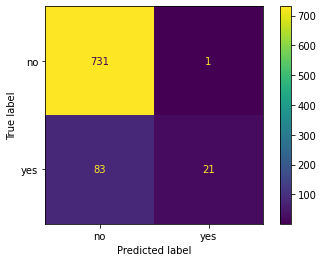

In [115]:
plot_confusion_matrix(lr ,tfidf_test,y_test,display_labels=['no','yes'])

# MLP Classifier

In [116]:
mlp = MLPClassifier()
mlp.fit(tfidf_train,y_train)
print('training accuracy is --> ',mlp.score(tfidf_train,y_train)*100)

training accuracy is -->  100.0


In [117]:
mlp.fit(tfidf_val,y_val)
print('Validation accuracy is --> ',mlp.score(tfidf_val,y_val)*100)

Validation accuracy is -->  100.0


In [118]:
mlp.fit(tfidf_test,y_test)
print('Test accuracy is --> ',mlp.score(tfidf_test,y_test)*100)

Test accuracy is -->  100.0


In [119]:
y_pred = mlp.predict(tfidf_test)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       1.00      1.00      1.00       104

    accuracy                           1.00       836
   macro avg       1.00      1.00      1.00       836
weighted avg       1.00      1.00      1.00       836



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


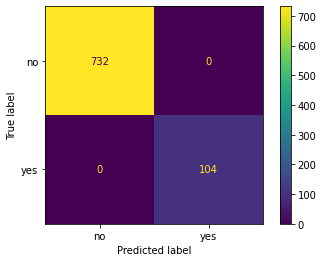

In [121]:
plot_confusion_matrix(mlp ,tfidf_test,y_test,display_labels=['no','yes'])

Since our aim is to reduce FN, hence increasing recall, MLP classifier suits best, according to accuracy as well as recall criteria.